Q1


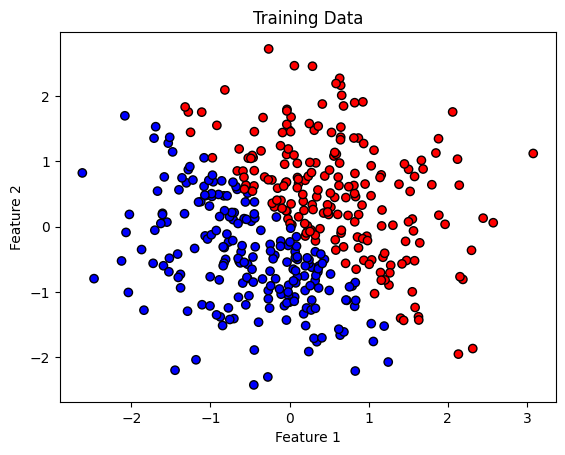

Epoch 1, Errors: 11
Epoch 2, Errors: 10
Epoch 3, Errors: 16
Epoch 4, Errors: 12
Epoch 5, Errors: 9
Epoch 6, Errors: 7
Epoch 7, Errors: 7
Epoch 8, Errors: 7
Epoch 9, Errors: 5
Epoch 10, Errors: 7
Epoch 11, Errors: 6
Epoch 12, Errors: 7
Epoch 13, Errors: 4
Epoch 14, Errors: 8
Epoch 15, Errors: 8
Epoch 16, Errors: 8
Epoch 17, Errors: 8
Epoch 18, Errors: 8
Epoch 19, Errors: 4
Epoch 20, Errors: 9
Epoch 21, Errors: 7
Epoch 22, Errors: 4
Epoch 23, Errors: 9
Epoch 24, Errors: 8
Epoch 25, Errors: 2
Epoch 26, Errors: 2
Epoch 27, Errors: 2
Epoch 28, Errors: 8
Epoch 29, Errors: 4
Epoch 30, Errors: 2
Epoch 31, Errors: 2
Epoch 32, Errors: 2
Epoch 33, Errors: 7
Epoch 34, Errors: 4
Epoch 35, Errors: 5
Epoch 36, Errors: 2
Epoch 37, Errors: 2
Epoch 38, Errors: 5
Epoch 39, Errors: 5
Epoch 40, Errors: 4
Epoch 41, Errors: 2
Epoch 42, Errors: 2
Epoch 43, Errors: 5
Epoch 44, Errors: 5
Epoch 45, Errors: 2
Epoch 46, Errors: 2
Epoch 47, Errors: 2
Epoch 48, Errors: 6
Epoch 49, Errors: 8
Epoch 50, Errors: 2
Epoch

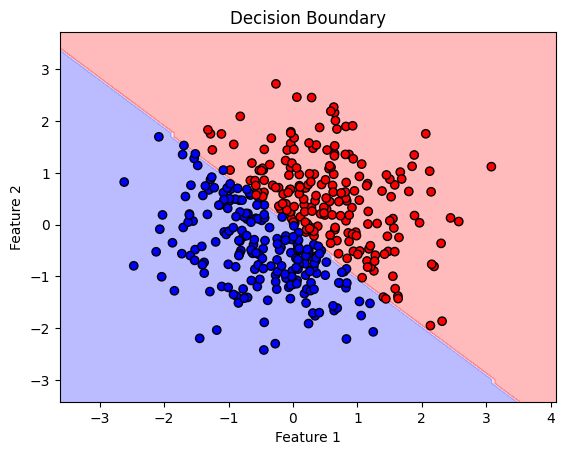

Accuracy on test data: 97.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Data Generation and Visualization
def generate_data(n_samples=500):
    np.random.seed(42)
    X = np.random.randn(n_samples, 2)
    y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Linearly separable boundary
    y[y == 0] = -1  # Convert to {-1, 1} for perceptron
    return X, y

#Generate dataset
X, y = generate_data()

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Visualize
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data')
plt.show()

#Perceptron Implementation
class Perceptron:
    def __init__(self, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def step_function(self, x):
        return 1 if x >= 0 else -1

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        errors = []

        for epoch in range(self.epochs):
            total_error = 0
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = self.step_function(linear_output)

                if y_pred != y[i]:
                    self.weights += self.lr * y[i] * X[i]
                    self.bias += self.lr * y[i]
                    total_error += 1
            errors.append(total_error)
            print(f'Epoch {epoch+1}, Errors: {total_error}')
            if total_error == 0:
                break

        return errors

    def predict(self, X):
        return np.array([self.step_function(np.dot(x, self.weights) + self.bias) for x in X])

#Training
perceptron = Perceptron(lr=0.1, epochs=100)
errors = perceptron.train(X_train, y_train)

#Visualization and Evaluation
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = np.array([model.predict(np.array([[x, y]]))[0] for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(X_train, y_train, perceptron)

#Evaluate on test data
y_pred = perceptron.predict(X_test)
accuracy = np.mean(y_pred == y_test) * 100
print(f'Accuracy on test data: {accuracy:.2f}%')


Q: Discuss how well the perceptron classifies the test data.                     
A: The perceptron did a really good job classifying the test data, getting 97% right! At first, it made more mistakes during training, but it got better over time. Even though the errors went up and down throughout the 100 rounds of training, the model eventually learned how to separate the two groups of data points quite well. This high accuracy shows that our simple perceptron, despite being one of the oldest and most basic machine learning models, worked great for this particular dataset where a straight line could effectively separate the two classes. The results prove that sometimes even the simplest models can work really well when the data allows for it.

Q2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from scipy.signal import correlate2d
from scipy.ndimage import zoom

In [ ]:
def manual_convolution(image, kernel=None, kernel_size=3, stride=1, padding="valid", mode="convolution"):

    # image is in numpy array
    image = np.array(image, dtype=float)

    # Set default kernel if not provided
    if kernel is None:
        # kernel with values between -1 and 1
        kernel = np.random.uniform(-1, 1, (kernel_size, kernel_size))
    else:
        # If kernel is provided
        kernel = np.array(kernel, dtype=float)
        kernel_size = kernel.shape[0]

    # Flip kernel for convolution
    if mode == "convolution":
        kernel = np.flipud(np.fliplr(kernel))


    if len(image.shape) == 3:  # If RGB toh convert mai convert
        image = np.mean(image, axis=2)
    img_height, img_width = image.shape

    #paddings
    if padding == "same":
        pad_h = int((kernel_size - 1) / 2)
        pad_w = int((kernel_size - 1) / 2)
        padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), 'constant')
    else:
        padded_image = image
        pad_h, pad_w = 0, 0


    out_height = int((padded_image.shape[0] - kernel_size) / stride + 1)
    out_width = int((padded_image.shape[1] - kernel_size) / stride + 1)


    output = np.zeros((out_height, out_width))

    for y in range(0, out_height):
        for x in range(0, out_width):
            # Get the current patch
            y_pos = y * stride
            x_pos = x * stride
            patch = padded_image[y_pos:y_pos+kernel_size, x_pos:x_pos+kernel_size]

            # Apply the kernel to the patch
            output[y, x] = np.sum(patch * kernel)

    return output

In [ ]:

def get_edge_detection_kernel():
    return np.array([
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ])

def get_horizontal_edge_kernel():
    return np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ])

def get_blur_kernel(size=3):
    return np.ones((size, size)) / (size * size)

def get_gaussian_blur_kernel(size=3, sigma=1.0):

    k = (size - 1) // 2
    x = np.arange(-k, k + 1)
    kernel_1d = np.exp(-0.5 * (x**2) / sigma**2)
    kernel_1d = kernel_1d / np.sum(kernel_1d)


    kernel_2d = np.outer(kernel_1d, kernel_1d)
    return kernel_2d

def get_sharpen_kernel():

    return np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ])

def get_symmetric_kernel():

    return np.array([
        [0.25, 0.25],
        [0.25, 0.25]
    ])

In [ ]:
def load_and_preprocess_image(image_path):


    img = Image.open(image_path)


    if img.mode != 'L':
        img = img.convert('L')

    img_array = np.array(img, dtype=float) / 255.0

    return img_array

def numpy_convolution(image, kernel, mode="convolution"):

    if mode == "convolution":
        kernel = np.flipud(np.fliplr(kernel))

    return correlate2d(image, kernel, mode='same', boundary='fill', fillvalue=0)

def visualize_results(images_dict, title="Convolution Results"):

    n = len(images_dict)
    fig, axes = plt.subplots(1, n, figsize=(n*5, 5))

    if n == 1:
        axes = [axes]

    for i, (name, img) in enumerate(images_dict.items()):
        if img.max() > 1.0 or img.min() < 0.0:
            img_display = (img - img.min()) / (img.max() - img.min()) if img.max() != img.min() else img
        else:
            img_display = img

        axes[i].imshow(img_display, cmap='gray')
        axes[i].set_title(name)
        axes[i].axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

Processing image: /content/kitty.jfif
Image loaded and converted to grayscale, Shape: (278, 181)


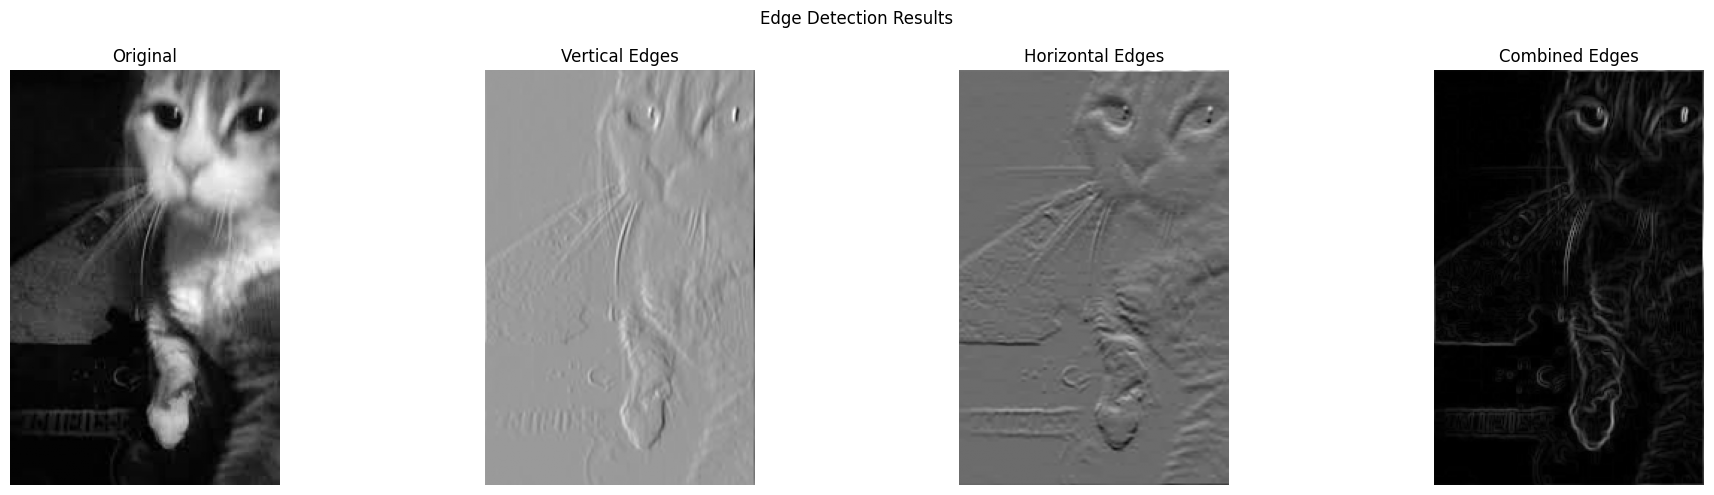

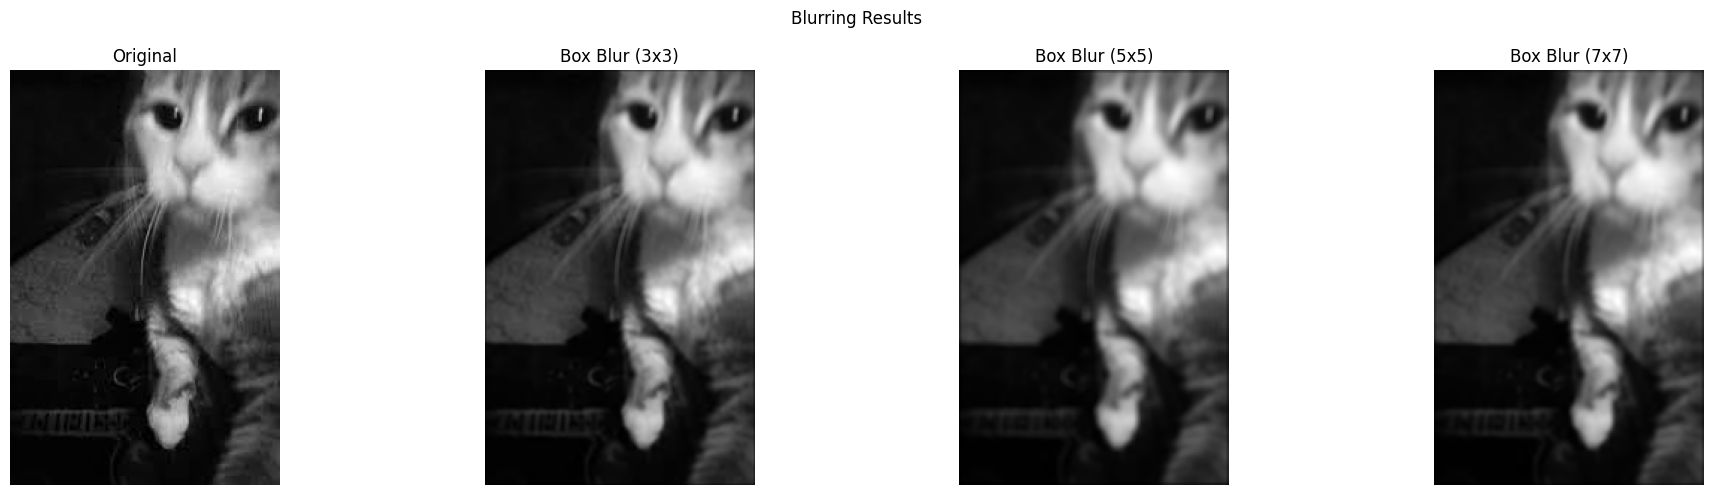

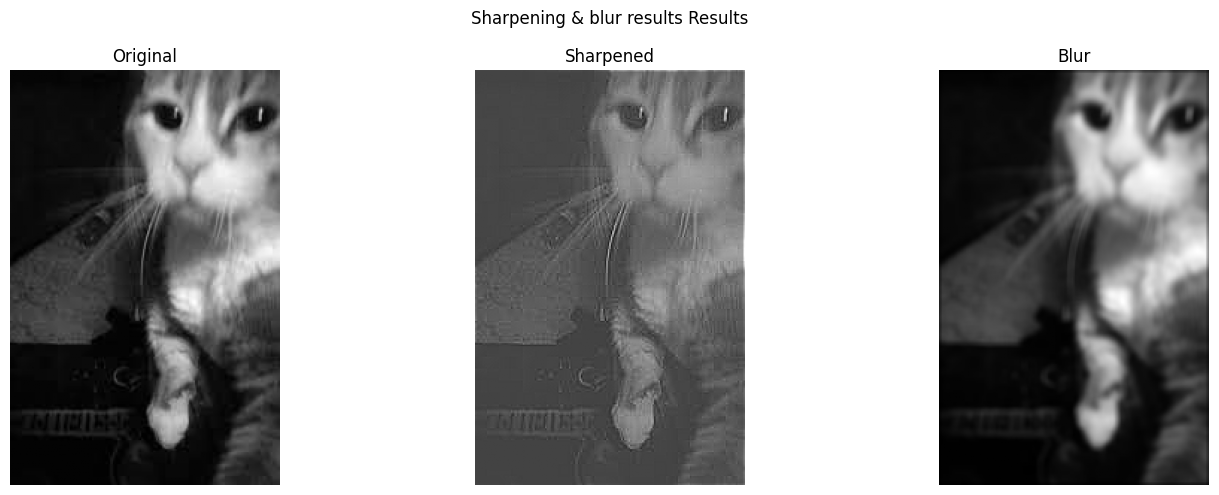

Comparing convolution vs correlation...


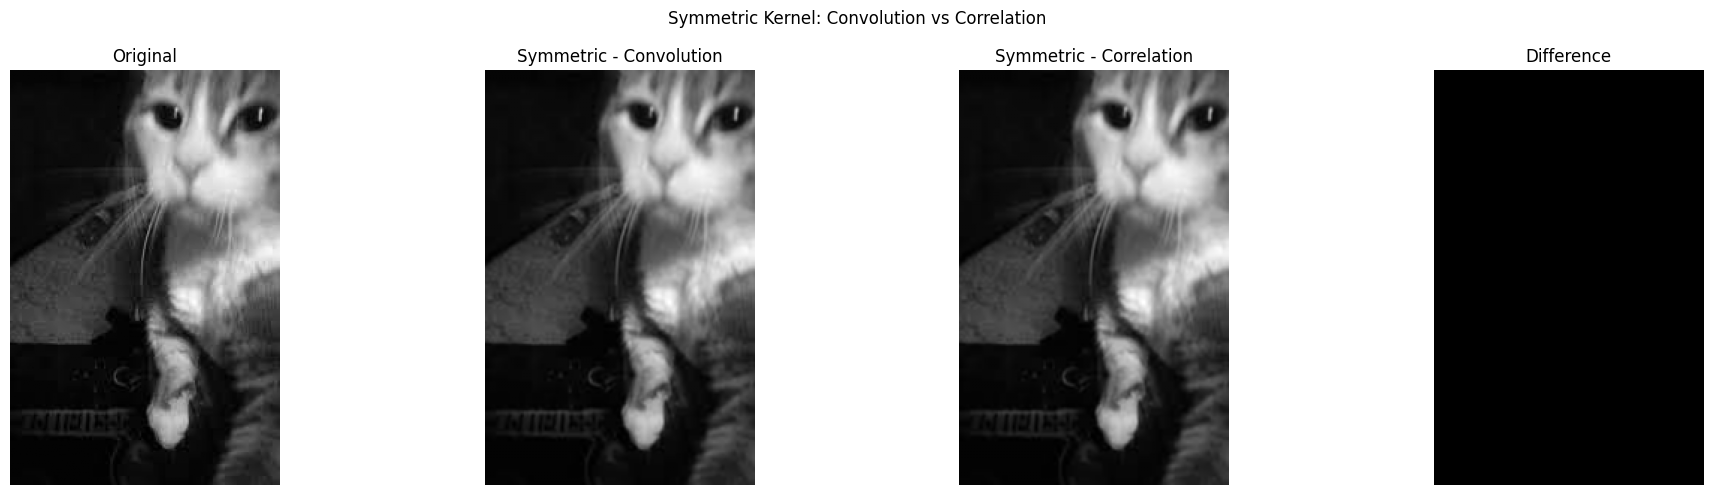

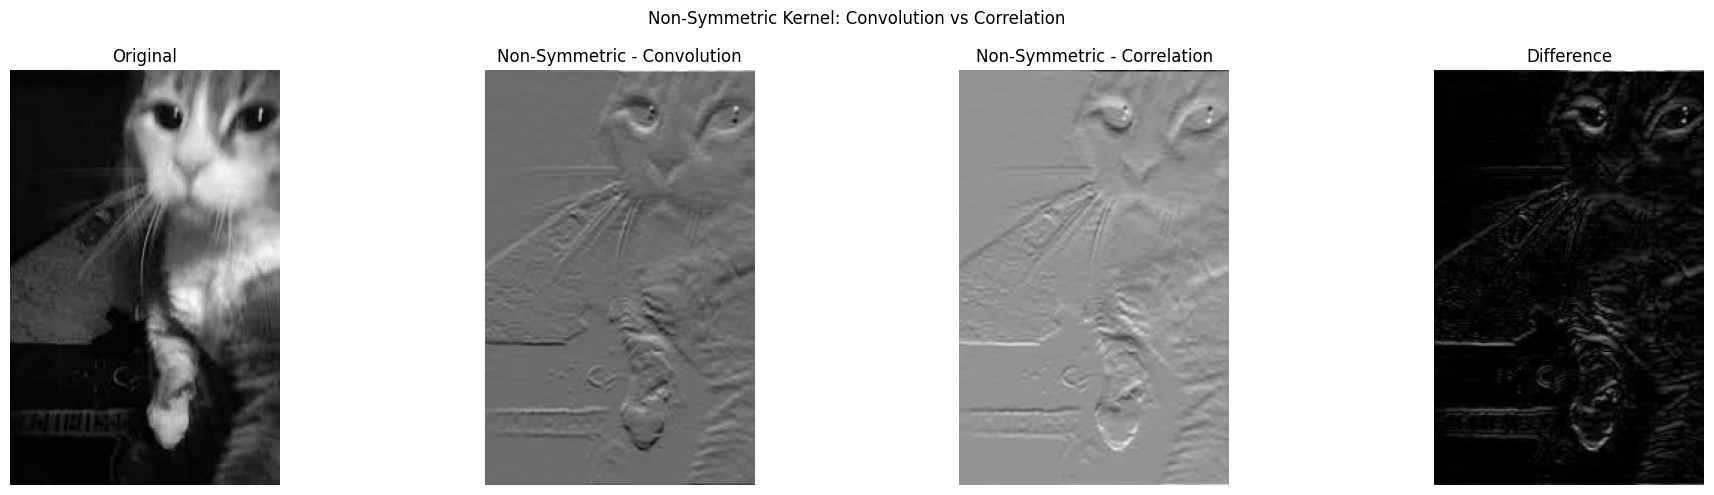

Comparing manual vs NumPy-based convolution


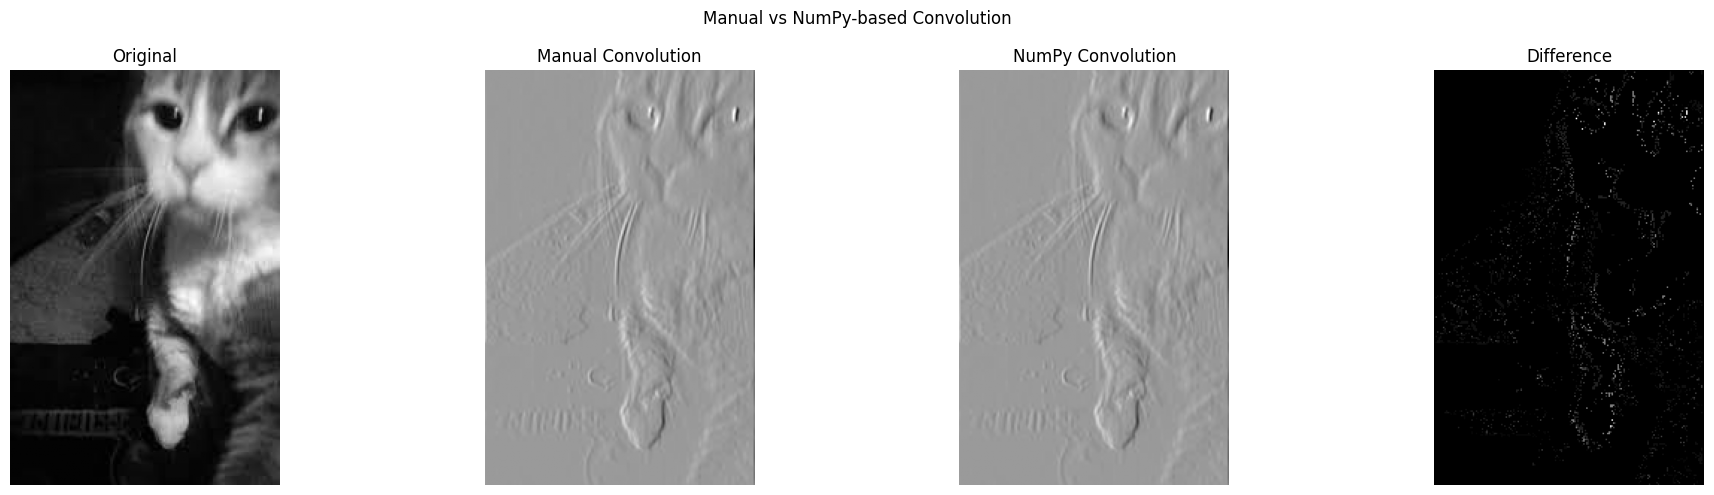

Testing different stride and padding options
Original shape: (278, 181)
Stride 1, Valid padding: (276, 179)
Stride 2, Valid padding: (138, 90)
Stride 1, Same padding: (278, 181)
Stride 2, Same padding: (139, 91)


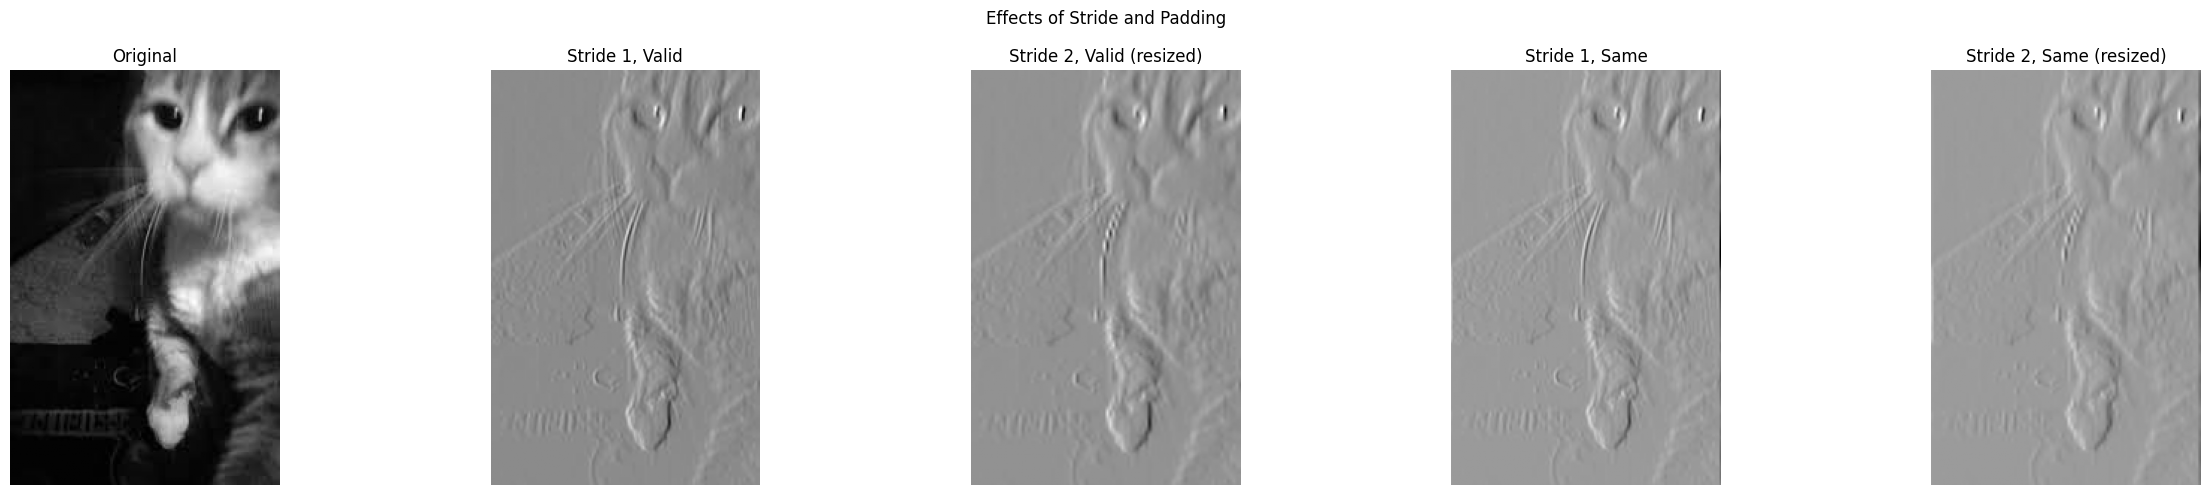

Testing sequential kernel application


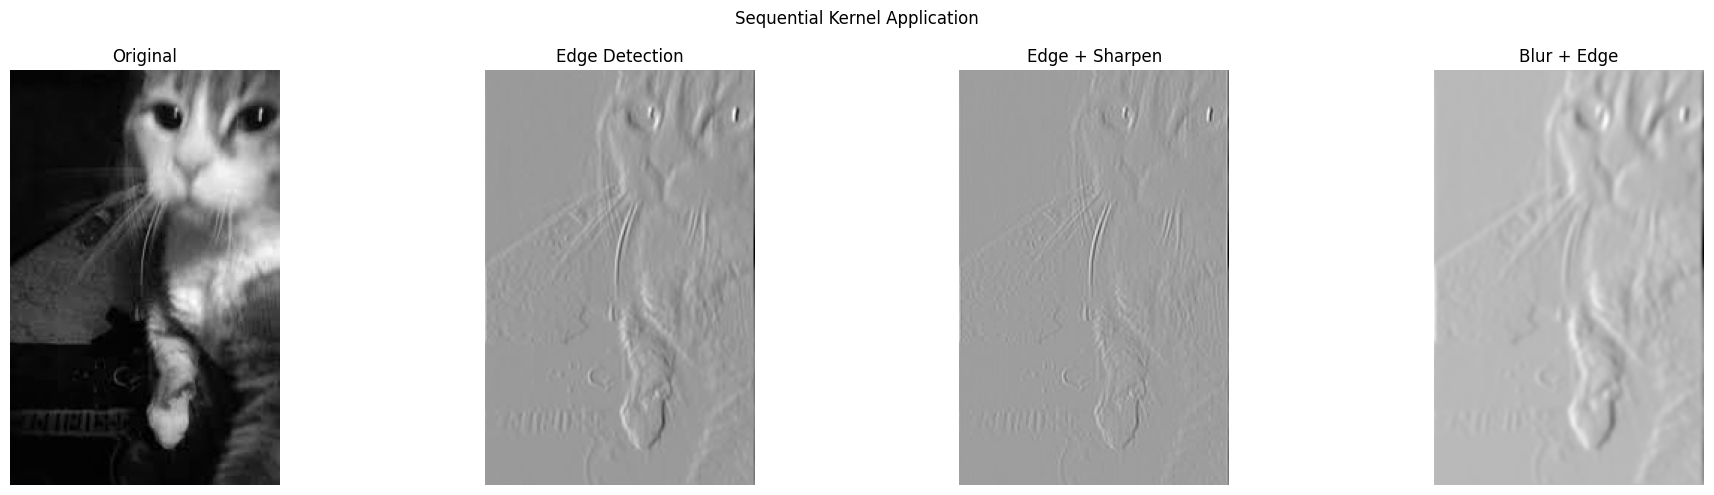

In [ ]:
def run_convolution_analysis(image_path):
    print(f"Processing image: {image_path}")

    # Load and preprocess image
    img = load_and_preprocess_image(image_path)
    print(f"Image loaded and converted to grayscale, Shape: {img.shape}")



    # Edge detection kernels
    vertical_edge_kernel = get_edge_detection_kernel()
    horizontal_edge_kernel = get_horizontal_edge_kernel()

    # Blurring kernels
    box_blur_kernel3 = get_blur_kernel(3)
    box_blur_kernel5 = get_blur_kernel(5)
    gaussian_blur_kernel = get_gaussian_blur_kernel(5, 1.5)

    # Sharpening kernel
    sharpen_kernel = get_sharpen_kernel()

    # Apply convolutions with "same" padding
    vertical_edges = manual_convolution(img, vertical_edge_kernel, padding="same")
    horizontal_edges = manual_convolution(img, horizontal_edge_kernel, padding="same")
    combined_edges = np.sqrt(vertical_edges**2 + horizontal_edges**2)

    box_blur3 = manual_convolution(img, box_blur_kernel3, padding="same")
    box_blur5 = manual_convolution(img, box_blur_kernel5, padding="same")
    gaussian_blur = manual_convolution(img, gaussian_blur_kernel, padding="same")

    sharpened = manual_convolution(img, sharpen_kernel, padding="same")

    # Visualize edge detection results
    edge_detection_results = {
        "Original": img,
        "Vertical Edges": vertical_edges,
        "Horizontal Edges": horizontal_edges,
        "Combined Edges": combined_edges
    }
    visualize_results(edge_detection_results, "Edge Detection Results")

    #Visualize blurring results
    blur_results = {
        "Original": img,
        "Box Blur (3x3)": box_blur3,
        "Box Blur (5x5)": box_blur5,
        "Box Blur (7x7)": gaussian_blur
    }
    visualize_results(blur_results, "Blurring Results")

    # Visualize sharpening results
    sharpen_results = {
        "Original": img,
        "Sharpened": sharpened,
        "Blur": box_blur5
    }
    visualize_results(sharpen_results, "Sharpening & blur results Results")

   #Compare Convolution vs Correlation
    print("Comparing convolution vs correlation...")

    # Symmetric kernel
    symmetric_kernel = get_symmetric_kernel()
    sym_conv = manual_convolution(img, symmetric_kernel, padding="same", mode="convolution")
    sym_corr = manual_convolution(img, symmetric_kernel, padding="same", mode="correlation")

    # Non-symmetric kernel
    nonsym_kernel = get_horizontal_edge_kernel()
    nonsym_conv = manual_convolution(img, nonsym_kernel, padding="same", mode="convolution")
    nonsym_corr = manual_convolution(img, nonsym_kernel, padding="same", mode="correlation")

    # Visualize symmetric kernel results
    symmetric_results = {
        "Original": img,
        "Symmetric - Convolution": sym_conv,
        "Symmetric - Correlation": sym_corr,
        "Difference": np.abs(sym_conv - sym_corr)
    }
    visualize_results(symmetric_results, "Symmetric Kernel: Convolution vs Correlation")

    # Visualize non-symmetric kernel results
    nonsymmetric_results = {
        "Original": img,
        "Non-Symmetric - Convolution": nonsym_conv,
        "Non-Symmetric - Correlation": nonsym_corr,
        "Difference": np.abs(nonsym_conv - nonsym_corr)
    }
    visualize_results(nonsymmetric_results, "Non-Symmetric Kernel: Convolution vs Correlation")

    #  Compare manual vs NumPy-based convolution
    print("Comparing manual vs NumPy-based convolution")

    # Edge detection with manual and NumPy implementations
    manual_edge = manual_convolution(img, vertical_edge_kernel, padding="same")
    numpy_edge = numpy_convolution(img, vertical_edge_kernel)

    # Visualize the comparison
    implementation_comparison = {
        "Original": img,
        "Manual Convolution": manual_edge,
        "NumPy Convolution": numpy_edge,
        "Difference": np.abs(manual_edge - numpy_edge)
    }
    visualize_results(implementation_comparison, "Manual vs NumPy-based Convolution")

    #Test different stride and padding options
    print("Testing different stride and padding options")

    # Apply convolutions with different strides and padding
    stride1_valid = manual_convolution(img, vertical_edge_kernel, stride=1, padding="valid")
    stride2_valid = manual_convolution(img, vertical_edge_kernel, stride=2, padding="valid")
    stride1_same = manual_convolution(img, vertical_edge_kernel, stride=1, padding="same")
    stride2_same = manual_convolution(img, vertical_edge_kernel, stride=2, padding="same")

    print(f"Original shape: {img.shape}")
    print(f"Stride 1, Valid padding: {stride1_valid.shape}")
    print(f"Stride 2, Valid padding: {stride2_valid.shape}")
    print(f"Stride 1, Same padding: {stride1_same.shape}")
    print(f"Stride 2, Same padding: {stride2_same.shape}")


    # Helper function to resize images to match the original
    def resize_to_match(img, target_shape):
        if img.shape == target_shape:
            return img
        zoom_factors = (target_shape[0] / img.shape[0], target_shape[1] / img.shape[1])
        return zoom(img, zoom_factors, order=1)

    # Resize images for visualization
    stride2_valid_resized = resize_to_match(stride2_valid, img.shape)
    stride2_same_resized = resize_to_match(stride2_same, img.shape)

    stride_padding_results = {
        "Original": img,
        "Stride 1, Valid": stride1_valid,
        "Stride 2, Valid (resized)": stride2_valid_resized,
        "Stride 1, Same": stride1_same,
        "Stride 2, Same (resized)": stride2_same_resized
    }
    visualize_results(stride_padding_results, "Effects of Stride and Padding")

    #Apply multiple kernels sequentially
    print("Testing sequential kernel application")

    # Sequences of kernel applications
    edge_then_sharpen = manual_convolution(vertical_edges, sharpen_kernel, padding="same")
    blur_then_edge = manual_convolution(gaussian_blur, vertical_edge_kernel, padding="same")

    sequential_results = {
        "Original": img,
        "Edge Detection": vertical_edges,
        "Edge + Sharpen": edge_then_sharpen,
        "Blur + Edge": blur_then_edge
    }
    visualize_results(sequential_results, "Sequential Kernel Application")


# Using the specific image path
image_path = "/content/kitty.jfif"
run_convolution_analysis(image_path)